In [8]:
import pygraphviz
import dowhy
import pandas as pd
import numpy as np

In [9]:
raw_data = pd.read_csv("./data/E-Mail_Analytics.csv")
raw_data

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
63995,10,2) $100 - $200,105.54,1,0,Urban,0,Web,Mens E-Mail,0,0,0.0
63996,5,1) $0 - $100,38.91,0,1,Urban,1,Phone,Mens E-Mail,0,0,0.0
63997,6,1) $0 - $100,29.99,1,0,Urban,1,Phone,Mens E-Mail,0,0,0.0
63998,1,5) $500 - $750,552.94,1,0,Surburban,1,Multichannel,Womens E-Mail,0,0,0.0


In [58]:

causal_graph = """digraph {
recency[label="Months Since Last Purchase"];
history_segment[label="$ category spent in 1 year"];
history[label="$ spent in 1 year"];
mens[label="M purchase in 1 year"];
womens[label="F purchase in 1 year"];
newbie[label="newbie in 1 year"];
channel[label="channel used in 1 year"];
segment[label="T: email segment"];
visit[label="visit"];
conversion[label="conversion"];
spend[label="Money spent"];

U[label="Unobserved Confounders",observed="no"];

U->{recency,history_segment,history,newbie,segment,channel,visit,conversion,spend};
segment -> visit;
segment -> conversion;
segment -> spend;

channel->visit; 
visit -> conversion;

history -> conversion;
recency -> conversion;
mens -> conversion;
womens -> conversion;
newbie -> conversion;

conversion -> spend;

recency -> visit;
mens -> womens [dir=both];
mens -> visit; womens -> visit;
newbie -> visit;

channel->history_segment;
recency->history_segment;
history->history_segment;
newbie->history_segment;
}"""

In [65]:
model= dowhy.CausalModel(
        data = raw_data,
        graph=causal_graph.replace("\n", " "),
        treatment="segment",
        outcome='spend')
model.view_model(size=(50,50))
model

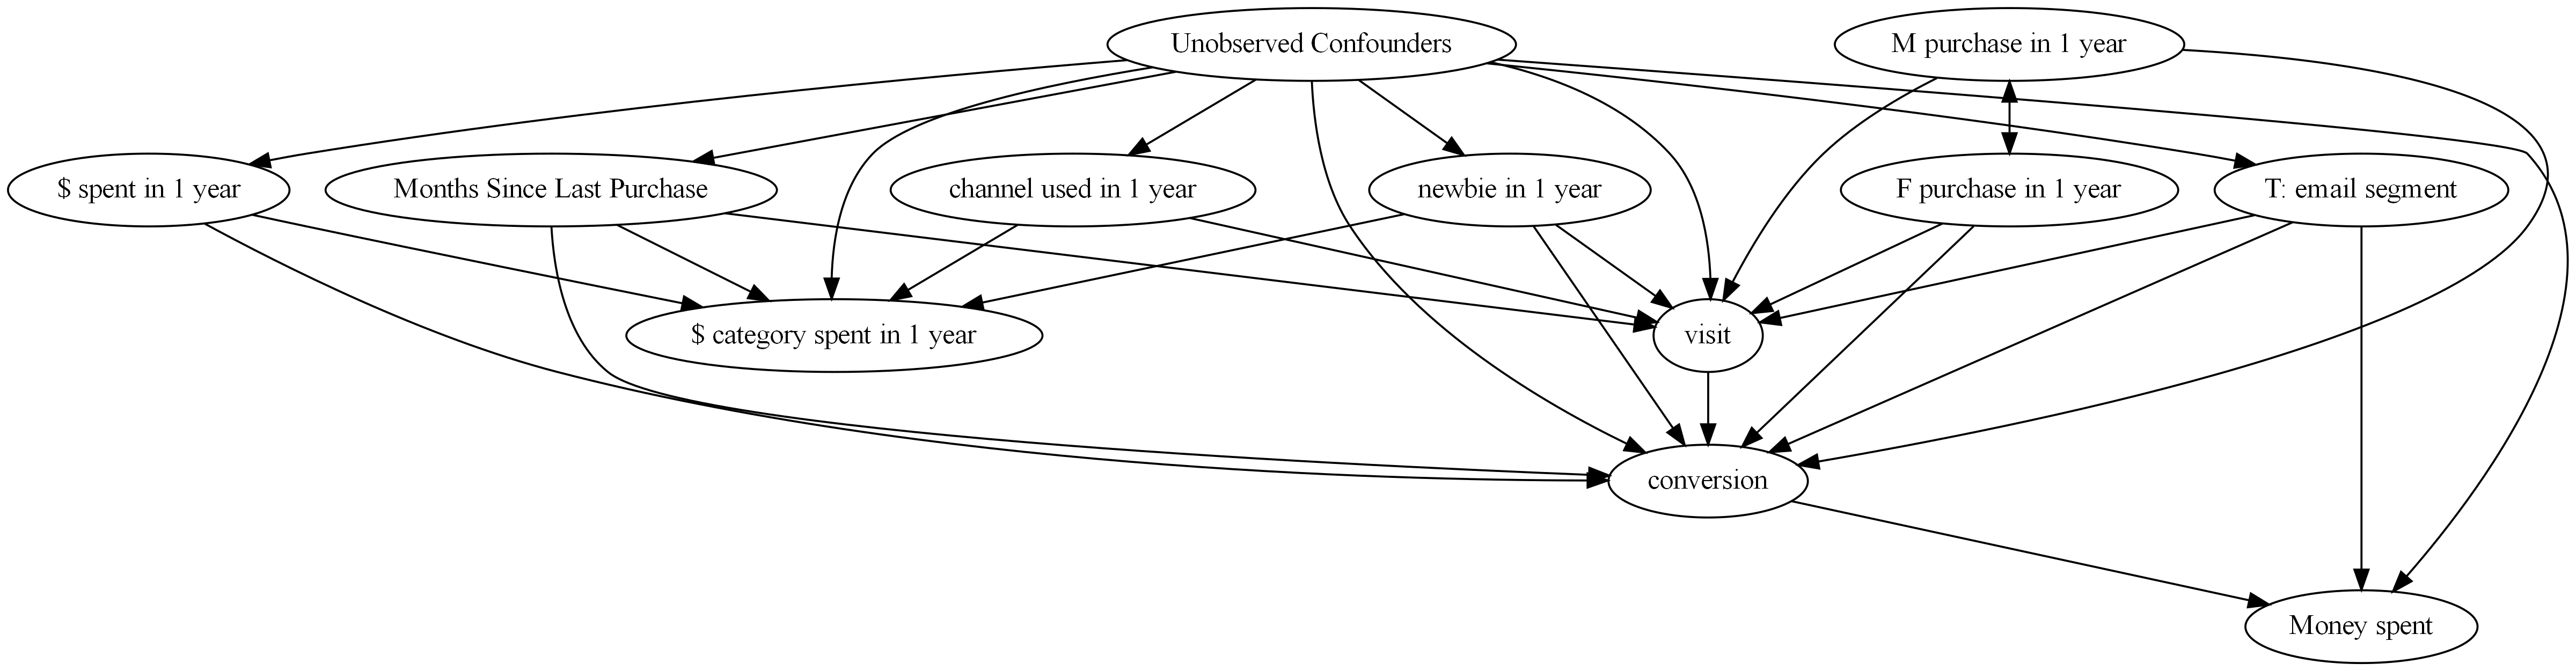

In [66]:
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [68]:
# Identify methods we can use to estimate the tech support effect (estimands)
segment_total_effect_identified_estimand = (
    model.identify_effect(
        estimand_type="nonparametric-ate",
        method_name="maximal-adjustment",
    )
)

# Print out all identified estimands
print(segment_total_effect_identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
No such variable(s) found!

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

